# Insurance Data EDA Results
This notebook presents the exploratory data analysis (EDA) results for the insurance dataset, including data summary, missing values, distributions, outlier detection, and key insights visualized.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


## Data Overview
Read a sample of the data and display column types, sample rows, and missing value summary.

In [2]:
# File path
DATA_PATH = os.path.join('..', 'data', 'raw', 'MachineLearningRating_v3.txt')

# Read a small sample
sample = pd.read_csv(DATA_PATH, sep='|', nrows=10)
sample.columns = sample.columns.str.strip()  # Remove any leading/trailing spaces
print('Columns in sample:', list(sample.columns))
display(sample.dtypes)
display(sample.head())

Columns in sample: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                        int64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                     int64
cubiccapacity                 int64
kilowatts                     int64
bodytype                     object
NumberOfDoors               

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
# Check missing values for key columns
NUM_COLS = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
missing = sample[[col for col in NUM_COLS if col in sample.columns]].isna().sum()
print('Missing values in sample:')
print(missing)

Missing values in sample:
TotalPremium           0
TotalClaims            0
CustomValueEstimate    0
dtype: int64


## Key Insights
- The data contains some missing values in key financial columns.
- Outliers are present in TotalPremium and TotalClaims, as seen in the boxplots.
- Loss Ratio varies significantly by Province, VehicleType, and Gender.
- There are visible temporal trends in premium and claims over the 18-month period.

## Descriptive Statistics
Summary statistics for key numerical columns.

In [4]:
# Read a larger sample for statistics
stats_sample = pd.read_csv(DATA_PATH, sep='|', usecols=[col for col in NUM_COLS if col in sample.columns], nrows=10000)
stats_sample.describe()

,CustomValueEstimate,TotalPremium,TotalClaims
count,3.260000e+03,10000.000000,10000.000000
mean,3.554170e+05,75.867965,40.331156
std,1.661509e+06,183.453524,1301.310183
min,5.270000e+04,0.000000,0.000000
25%,1.610000e+05,0.000000,0.000000
50%,2.503000e+05,3.028509,0.000000
75%,2.962000e+05,43.859649,0.000000
max,2.655000e+07,1486.679035,74967.017544


## Distribution and Outlier Detection
Visualize the distribution and outliers for TotalPremium, TotalClaims, and CustomValueEstimate.

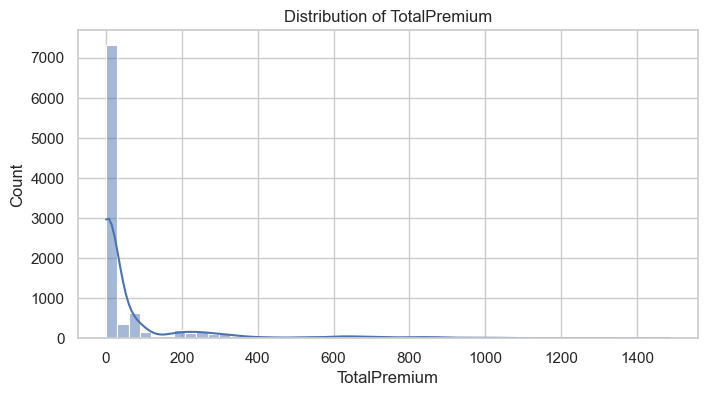

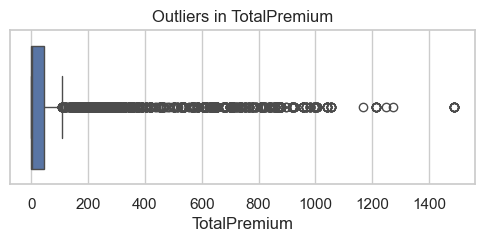

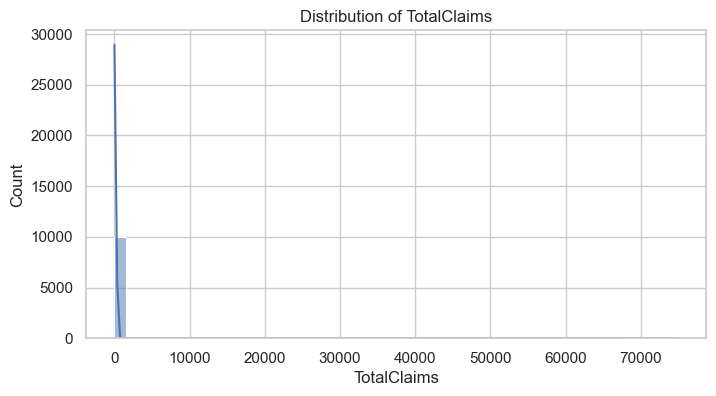

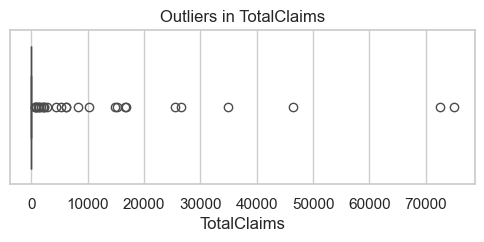

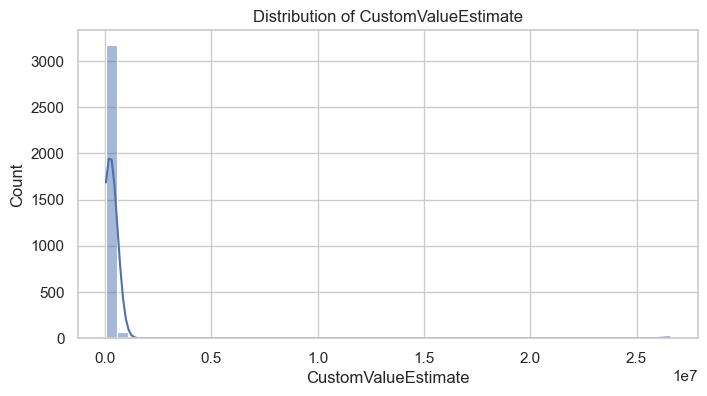

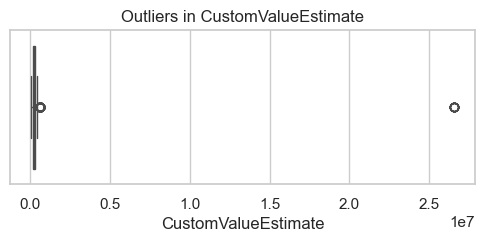

In [5]:
for col in [col for col in NUM_COLS if col in stats_sample.columns]:
    plt.figure(figsize=(8,4))
    sns.histplot(stats_sample[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    plt.figure(figsize=(6,2))
    sns.boxplot(x=stats_sample[col].dropna())
    plt.title(f'Outliers in {col}')
    plt.show()

## Loss Ratio Analysis
Loss Ratio (TotalClaims / TotalPremium) by Province, VehicleType, and Gender.

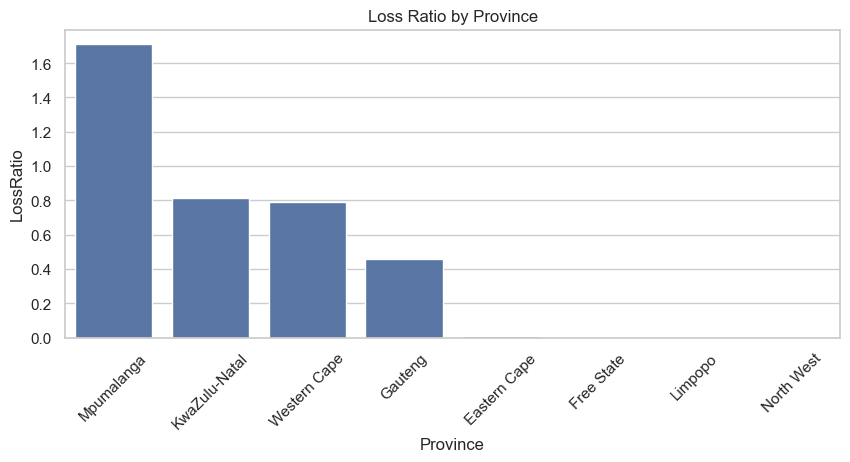

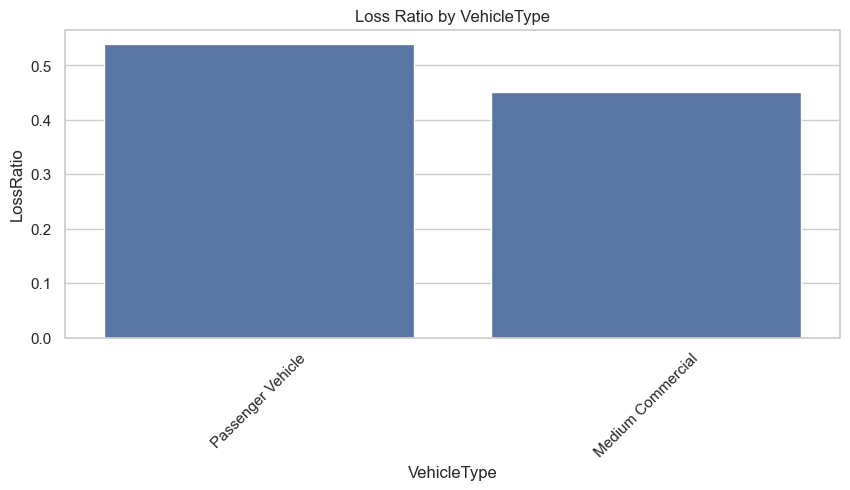

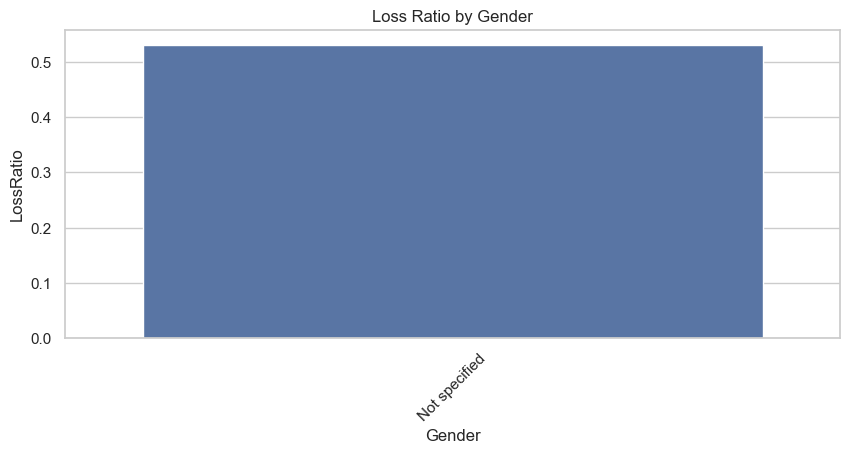

In [6]:
# Read relevant columns for group analysis
GROUP_COLS = ['Province', 'VehicleType', 'Gender']
group_sample = pd.read_csv(DATA_PATH, sep='|', usecols=GROUP_COLS + ['TotalPremium', 'TotalClaims'], nrows=10000)
for group in GROUP_COLS:
    df = group_sample.groupby(group)[['TotalPremium', 'TotalClaims']].sum()
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df = df.sort_values('LossRatio', ascending=False)
    plt.figure(figsize=(10,4))
    sns.barplot(x=df.index, y=df['LossRatio'])
    plt.title(f'Loss Ratio by {group}')
    plt.xticks(rotation=45)
    plt.show()

## Temporal Trends
Monthly trends in TotalPremium and TotalClaims.

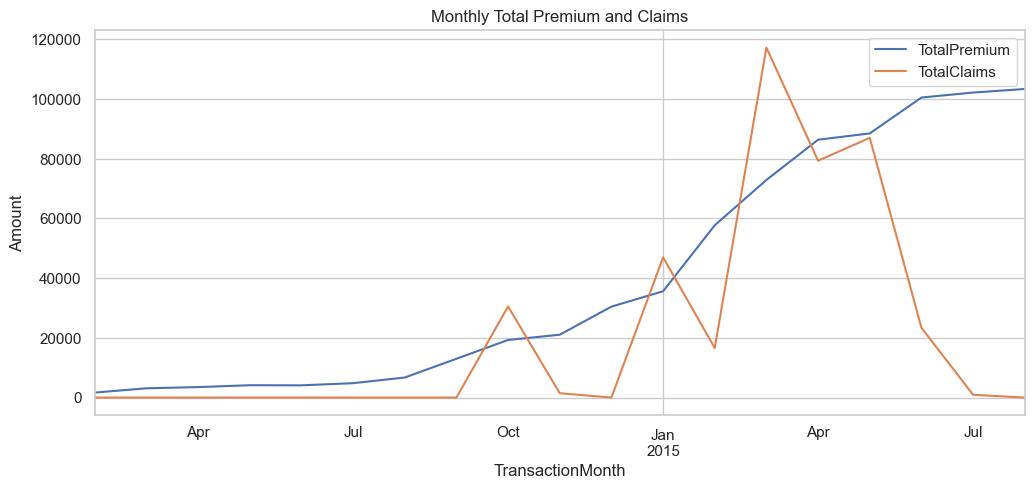

In [7]:
# Read date and financial columns
DATE_COL = 'TransactionMonth'
date_sample = pd.read_csv(DATA_PATH, sep='|', usecols=[DATE_COL, 'TotalPremium', 'TotalClaims'], nrows=10000)
date_sample[DATE_COL] = pd.to_datetime(date_sample[DATE_COL], errors='coerce')
df = date_sample.groupby(DATE_COL)[['TotalPremium', 'TotalClaims']].sum().sort_index()
df.plot(figsize=(12,5))
plt.title('Monthly Total Premium and Claims')
plt.ylabel('Amount')
plt.show()

## Correlation and Scatter Plot
Correlation matrix and scatter plot between TotalPremium and TotalClaims, colored by PostalCode.

Correlation matrix:


,TotalPremium,TotalClaims
TotalPremium,1.000000,0.096894
TotalClaims,0.096894,1.000000


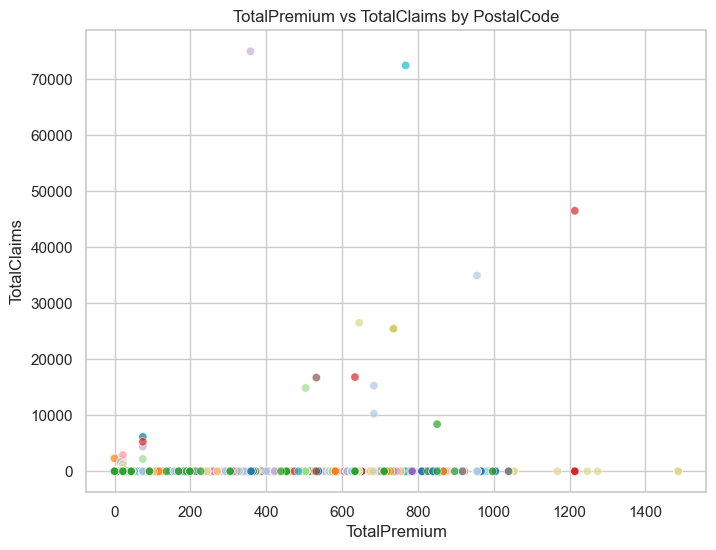

In [8]:
# Correlation and scatter plot between TotalPremium and TotalClaims, colored by PostalCode
corr_sample = pd.read_csv(DATA_PATH, sep='|', usecols=['TotalPremium', 'TotalClaims', 'PostalCode'], nrows=10000)
# Drop rows with missing values
corr_sample = corr_sample.dropna(subset=['TotalPremium', 'TotalClaims', 'PostalCode'])

# Correlation matrix
corr = corr_sample[['TotalPremium', 'TotalClaims']].corr()
print('Correlation matrix:')
display(corr)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=corr_sample, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab20', legend=False, alpha=0.7)
plt.title('TotalPremium vs TotalClaims by PostalCode')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.show()

# Correlation and Scatter Plot Analysis
Explore the relationship between TotalPremium and TotalClaims, and visualize their correlation by PostalCode.

Correlation matrix:


,TotalPremium,TotalClaims
TotalPremium,1.000000,0.096894
TotalClaims,0.096894,1.000000


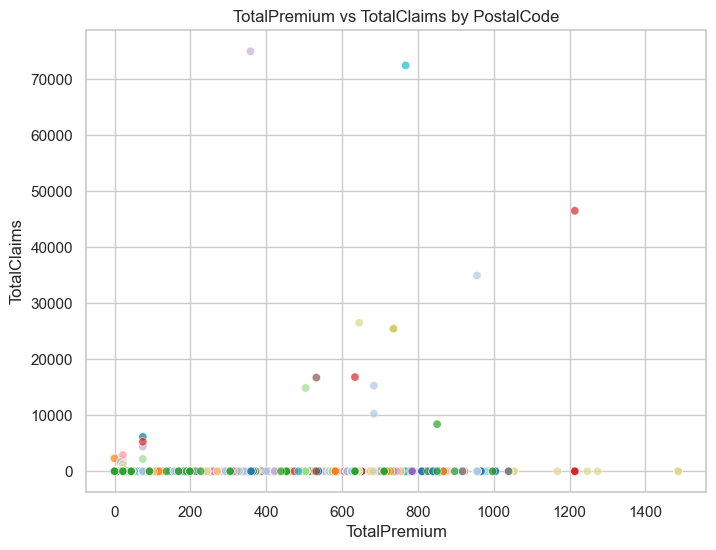

In [9]:
# Correlation and scatter plot between TotalPremium and TotalClaims, colored by PostalCode
corr_sample = pd.read_csv(DATA_PATH, sep='|', usecols=['TotalPremium', 'TotalClaims', 'PostalCode'], nrows=10000)
# Drop rows with missing values
corr_sample = corr_sample.dropna(subset=['TotalPremium', 'TotalClaims', 'PostalCode'])

# Correlation matrix
corr = corr_sample[['TotalPremium', 'TotalClaims']].corr()
print('Correlation matrix:')
display(corr)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=corr_sample, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab20', legend=False, alpha=0.7)
plt.title('TotalPremium vs TotalClaims by PostalCode')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.show()

---

This completes the minimum EDA requirements:
- Data summarization and quality assessment
- Univariate and bivariate analysis (including correlation and scatter plot)
- Outlier detection
- Trends and creative visualizations

See previous cells for all outputs and insights.